## Car Sales
This notebook is about car sales data from a car dealership over the curse of the two last years. The Dataset contains at least 2.000.000 rows. 

The analysis of this Dataset will allow us to understand the car sales trend over the time, the performance of individual salespeople in the dealership, to predict sales performance and analyizing the impact of differents factors on car sales, such as car make, model, year, and salesperson performance.

The Dataset includes nine columns of data for each car sale, such as Date, Car Make, Car Model.


**Content:**

1. Data Exploration.
2. Data Visualization.

**Features:**

1. **Date:** The date of the car sale.
2. **Salesperson:** The name of the salesperson who made the sale.
3. **Customer Name:** The name of the customer who purchased the car.
4. **Car Make:** The make of the car that was purchased.
5. **Car Model:** The model of the car that was purchased.
6. **Car Year:** The year of the car that was purchased.
7. **Sale Price:** The sale price of the car in USD.
8. **Commission Rate:** The commission rate paid to the salesperson on the sale.
9. **Commission Earned:** The amount of commission earned by the salesperson on the sale.

## Questions to Be Answered with the Dataset
1. Who were the salespeople who made the most sales during the year?
2. What are the best-selling car models at the dealership?
3. What is the distribution of sales by car brand throughout the year?


In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read the csv file
df = pd.read_csv("car_sales_data.csv")

## Data Exploration

In [3]:
#Show the first few records
df.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,8/1/2022,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73
1,3/15/2023,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40
2,4/29/2023,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63
3,9/4/2022,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20
4,6/16/2022,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85


In [4]:
#Get the numbers of records and columns
df.shape

(180454, 9)

In [5]:
#Get concise sumary dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180454 entries, 0 to 180453
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               180454 non-null  object 
 1   Salesperson        180454 non-null  object 
 2   Customer Name      180454 non-null  object 
 3   Car Make           180454 non-null  object 
 4   Car Model          180454 non-null  object 
 5   Car Year           180454 non-null  int64  
 6   Sale Price         180454 non-null  int64  
 7   Commission Rate    180454 non-null  float64
 8   Commission Earned  180454 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 12.4+ MB


In [6]:
#Check missing values
df.isnull().sum()

Date                 0
Salesperson          0
Customer Name        0
Car Make             0
Car Model            0
Car Year             0
Sale Price           0
Commission Rate      0
Commission Earned    0
dtype: int64

In [7]:
#Check duplicated values
df.duplicated().sum()

0

In [8]:
df.describe()

,Car Year,Sale Price,Commission Rate,Commission Earned
count,180454.000000,180454.000000,180454.000000,180454.000000
mean,2015.991289,30012.500488,0.099982,3001.450472
std,3.740299,11552.528440,0.028814,1482.262483
min,2010.000000,10000.000000,0.050001,507.220000
25%,2013.000000,20026.000000,0.075055,1820.347500
50%,2016.000000,29999.000000,0.099983,2743.010000
75%,2019.000000,40043.000000,0.124932,3979.537500
max,2022.000000,50000.000000,0.149999,7489.190000


In [9]:
df[df['Sale Price'] == 10000]

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
33751,10/31/2022,Emily King,Derek Cisneros,Nissan,Altima,2012,10000,0.130833,1308.33
52503,5/30/2022,Marcus Christensen,Eric Hernandez,Nissan,Silverado,2020,10000,0.098027,980.27
78199,4/6/2023,Jeffrey Hodges,Jenna Bullock,Nissan,Civic,2017,10000,0.095645,956.45
140732,10/31/2022,Chloe Robinson,Stephanie Horton,Toyota,Civic,2018,10000,0.135709,1357.09


In [10]:
df[df['Sale Price'] == 50000]

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
76249,4/26/2023,Dr. Angela Becker,Keith Cook,Nissan,F-150,2013,50000,0.109119,5455.96
79326,9/27/2022,Debra Lee,Amy King,Chevrolet,Altima,2014,50000,0.072058,3602.88
83733,6/23/2022,Erica Mejia,Travis Orr,Nissan,F-150,2014,50000,0.143951,7197.53
128547,3/14/2023,Bradley Jackson,Heather Campbell,Honda,Civic,2015,50000,0.090642,4532.08
130649,9/14/2022,Elizabeth Montgomery,Jordan Smith,Nissan,Silverado,2012,50000,0.133554,6677.69


## Data Visualization

### Who were the salespeople who made the most sales during the year?

In [11]:
#People with most sales
most_sales_people = df['Salesperson'].value_counts().nlargest(10).reset_index()
most_sales_people

,Salesperson,count
0,Michael Smith,87
1,Michael Johnson,75
2,David Smith,64
3,Michael Williams,63
4,Michael Jones,62
5,James Smith,61
6,Jennifer Smith,55
7,Robert Smith,55
8,Michael Davis,52
9,William Smith,52


C:\Users\Aleyne\AppData\Local\Temp\ipykernel_10504\3365880605.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Salesperson', y= 'count', data=most_sales_people, palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Michael Smith'),
  Text(1, 0, 'Michael Johnson'),
  Text(2, 0, 'David Smith'),
  Text(3, 0, 'Michael Williams'),
  Text(4, 0, 'Michael Jones'),
  Text(5, 0, 'James Smith'),
  Text(6, 0, 'Jennifer Smith'),
  Text(7, 0, 'Robert Smith'),
  Text(8, 0, 'Michael Davis'),
  Text(9, 0, 'William Smith')])

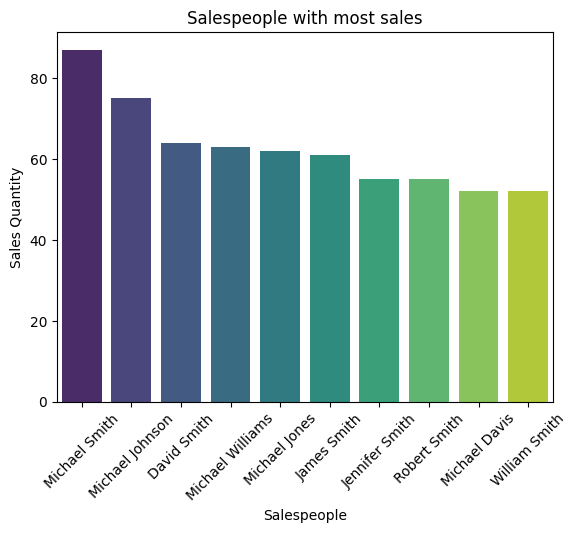

In [12]:
#Visualize salespeople with most sales
most_sales_people_columns = ['Salesperson', 'count']

sns.barplot(x='Salesperson', y= 'count', data=most_sales_people, palette='viridis')
plt.title('Salespeople with most sales')
plt.xlabel('Salespeople')
plt.ylabel('Sales Quantity')
plt.xticks(rotation=45)

### Report

The graph shows the sales quantities of the best performing salespeople in a dealership.
The corresponding number of sales achieved is listed with the name of the salesperson who made the sales during the specified period. This representation provides a clear view of the individual sales performance of each salesperson, highlighting their contributions to the overall sales success of the dealership.

The graph allows a direct comparison of the sales quantities achieved by each salesperson, showing the top performers in terms of sales volume.
It indicates each salesperson's effectiveness in closing deals, generating revenue and maintaining customer relationships. In addition, the different sales quantities demonstrate the consistency of high-performing companies in meeting sales targets over time.

It is clear from the analysis of the data that salespeople such as Michael Smith, James Smith and others with significant amounts of sales have played a crucial role in increasing the dealership's sales performance.

The distribution of sales quantities among salespeople provides valuable information about individual performance levels and highlights areas of strength within the sales team. In addition, the chart provides insight into the impactful sales strategies or approaches employed by top-performing salespeople that lead to higher sales volumes.

To effectively leverage this data for company growth, it is recommended to recognize and reward top performing salespeople to motivate and retain talent within the team. Providing training programs and resources to improve skills can help improve overall performance. Implement a performance tracking system to monitor individual sales on a regular basis and encourage collaboration among team members to share best practices.

By using insights gained from top-selling salespeople, companies can identify successful sales tactics, set realistic sales goals, motivate team members, and drive continuous improvement across the sales team. This data-driven approach can lead to improved performance, increased revenue generation and sustained success in the competitive dealership environment.


### What are the best-selling models at the dealership?

In [13]:
#Best-selling car models
best_selling_models = df['Car Model'].value_counts().nlargest(5)
best_selling_models

Car Model
Civic        36250
Silverado    36098
Corolla      36090
F-150        36058
Altima       35958
Name: count, dtype: int64

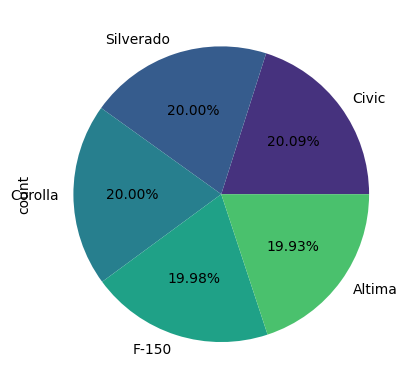

In [14]:
#Visualize best-selling car models
colors = sns.color_palette("viridis")
best_selling_models.plot(kind = 'pie', colors= colors, autopct = '%1.2f%%');

### Report

This graphic shows the distribution of sales of the most sold car models in the dealership. From the analysis of the data, it is possible to extract information on customer preferences and sales trends within the dealership.
The graphic shows the sales distribution of five prominent car models: Civic, Silverado, Corolla, Altima and F-150. Each model accounts for approximately 20.0% of total sales, indicating a balanced demand among these popular models. Analysis of this chart provides insight into the competitive landscape and customer preferences within the dealership.

The presence of multiple models with similar sales percentages highlights the diverse preferences among customers visiting the dealership. This diversity underscores the importance of offering a wide range of models to effectively meet different customer needs and preferences. The level playing field in terms of popularity of the selected models suggests that all have a strong customer base and each contributes significantly to overall sales.

This equality indicates healthy competition among the models, ensuring that no one model overly dominates the market. Consistent model sales percentages throughout the year indicate a stable and predictable demand for these vehicles. This stability reflects customer confidence in the selected models and brand, providing a solid foundation for dealer operations.

To improve sales and customer satisfaction, it is advisable to divide the customer market into smaller groups with similar characteristics and needs, i.e., perform detailed market segmentation. Tailor marketing strategies to communicate effectively to these segments to improve customer engagement and satisfaction. It is critical to ensure that all popular models receive fair and equitable promotion, thereby maximizing their sales potential. By providing appropriate attention and promotion to each model, you can capitalize on diverse customer preferences and stimulate overall sales growth.

Analysis of this sales data serves several purposes, including optimizing inventory to effectively meet demand, strategic marketing planning based on customer preferences, making informed decisions for introducing new models or price adjustments, improving the customer experience through personalized offers, and competitive analysis to compare performance with rivals.

In conclusion, a detailed analysis of this data field provides valuable insights into customer preferences, sales trends and strategic growth opportunities within dealership operations.

### What is the distribution of sales by car brand throughout the year?

In [15]:
#Distributions of sales by brand
distribution_by_brand = df['Car Make'].value_counts().nlargest(5)
distribution_by_brand

Car Make
Ford         36156
Nissan       36139
Chevrolet    36122
Toyota       36051
Honda        35986
Name: count, dtype: int64

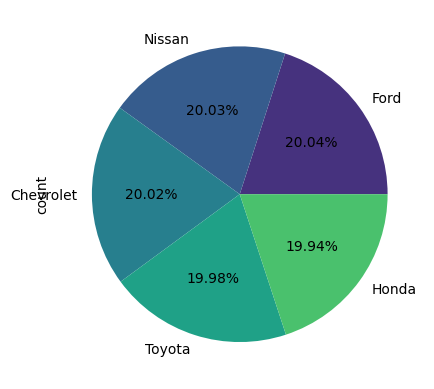

In [16]:
#Visualization of the sales by brand
colors = sns.color_palette("viridis")
distribution_by_brand.plot(kind = 'pie', colors= colors, autopct = '%1.2f%%');